In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')
df.head(5)

,Номер пожара,Дата,X,Y,"Площадь, га","температура, °С","относительная влажность, %","влажность почвы (в слое 0-10см), %","атмосферное давление, мбар",Тип растительности
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


In [3]:
df.shape

(49, 10)

Для начала построить графики, но для этого необходимо отформатировать данные

# **1. Информация**

## **1.1 Переименовываем колонки (англ. яз)**

In [4]:
df.rename(columns={df.columns[0]: 'Fire number', df.columns[1]: 'Date', df.columns[4]: 'Area', 
                   df.columns[5]: 'Temp',df.columns[6]: 'Rel_hum', df.columns[7]: 'Soil_moist',
                  df.columns[8]: 'Atm_pres', df.columns[9]: 'V_type'}, inplace=True) # inplace=True для внесения изменений в датасет (изменения сразу вступают в силу)

In [5]:
df.head(5)

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


## **1.2 Информация о данных**

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fire number  49 non-null     int64  
 1   Date         49 non-null     object 
 2   X            49 non-null     float64
 3   Y            49 non-null     float64
 4   Area         49 non-null     int64  
 5   Temp         49 non-null     float64
 6   Rel_hum      49 non-null     float64
 7   Soil_moist   49 non-null     float64
 8   Atm_pres     49 non-null     float64
 9   V_type       49 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 4.0+ KB


In [7]:
df.describe()

,Fire number,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,139643.653061,47.183271,42.488180,97.836735,16.025878,48.957143,27.438571,887.863265
std,99941.919391,0.574760,0.486414,184.406407,8.884035,16.539549,7.554540,76.999674
min,13167.000000,45.830200,41.595000,3.000000,-2.390000,20.100000,14.080000,752.500000
25%,26566.000000,46.829700,42.163600,12.000000,12.219000,37.100000,21.780000,807.500000
50%,143057.000000,47.456200,42.333100,26.000000,14.382000,48.100000,27.470000,910.300000
75%,204400.000000,47.664300,42.883500,90.000000,19.844000,60.500000,30.730000,953.500000
max,293489.000000,47.834500,43.369900,961.000000,33.758000,90.700000,43.770000,1023.600000


# **2. Визуализация данных**

## **2.1 Кол-во пожаров по типам растительности (V_type)**

In [8]:
df['V_type'].value_counts() # уникальные значения в этой колонке

Луг                 26
Лиственный лес      22
Темнохвойный лес     1
Name: V_type, dtype: int64

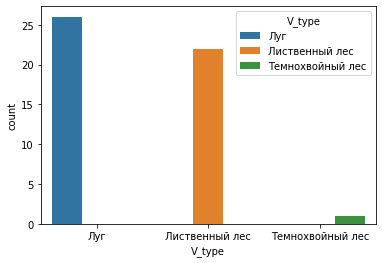

In [9]:
sns.countplot(x=df['V_type'], hue=df['V_type']); # hue параметр для создания легенды карты 

## **2.2 Добавляем новую колонку (месяц)**

In [10]:
df['Num_month'] = df['Date'].apply(lambda date: int(date.split('/')[0])) # создание новой колонки, чтобы отобразить график пожаров по каждому месяцу

In [11]:
df.head(5)

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type,Num_month
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг,7
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг,7
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг,7
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг,10
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес,6


In [12]:
def to_month(num_month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months[num_month - 1]

In [13]:
# для графика количества пожаров по дням недели 
def to_day_week(date):
    month = int(date.split('/')[0])
    day = int(date.split('/')[1])
    year = int(date.split('/')[2])
    today = datetime.datetime(year, month, day)
    num_day_week = today.weekday() # номер дня недели 
    days_week = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    return days_week[num_day_week]

## **2.3 Кол-во пожаров по месяцам каждой растительности**

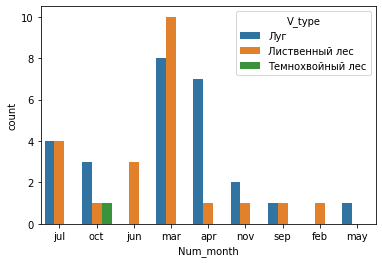

In [14]:
sns.countplot(x=df['Num_month'].apply(lambda num_month: to_month(num_month)), hue=df['V_type']); # преобразование: привели цифру месяца в его соответствующее название

## **2.4 Кол-во пожаров по дням недели каждой растительности**

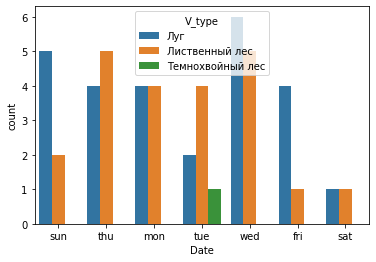

In [15]:
sns.countplot(x=df['Date'].apply(lambda date: to_day_week(date)), hue=df['V_type']); # преобразование: привели цифру дня недели в его соответствующее название

## **2.5 Распределение Area и Temp для каждого пожара**

In [16]:
# отбор по типам пожара
lugs = df[(df['V_type'] == 'Луг')]
listv_forest = df[(df['V_type'] == 'Лиственный лес')]
temn_forest = df[(df['V_type'] == 'Темнохвойный лес')]

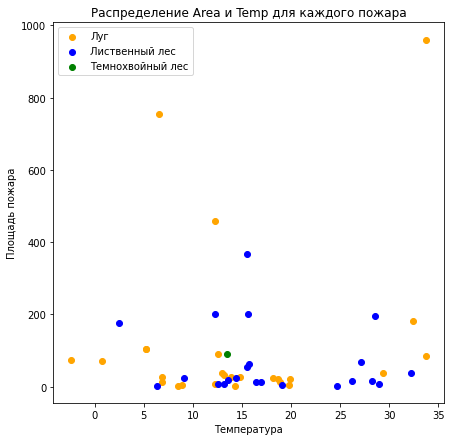

In [21]:
plt.figure(figsize=(7, 7))
plt.scatter(lugs['Temp'], lugs['Area'], color='orange', label='Луг');
plt.scatter(listv_forest['Temp'], listv_forest['Area'], color='blue', label='Лиственный лес');
plt.scatter(temn_forest['Temp'], temn_forest['Area'], color='green', label='Темнохвойный лес');

plt.xlabel('Температура');
plt.ylabel('Площадь пожара');
plt.title('Распределение Area и Temp для каждого пожара');
plt.legend();

# **3. Строим модель и прогнозируем плозадь пожара**

In [22]:
# создаем функцию для прогнозирования пожара
def fire_area(date, X, Y, temp, humidity, soil_moisture, pressure_pa, V_type):
  df = pd.read_csv('Data.csv')
  df.rename(columns={df.columns[0]: 'Fire number', df.columns[1]: 'Date', df.columns[4]: 'Area', 
                   df.columns[5]: 'Temp',df.columns[6]: 'Rel_hum', df.columns[7]: 'Soil_moist',
                  df.columns[8]: 'Atm_pres', df.columns[9]: 'V_type'}, inplace=True)
  df.drop(['Fire number', 'X', 'Y', 'Date'], axis=1, inplace=True) # можно удалить колонки, которые не имеют смысла в конечном итоге
    
  df = df[(df['V_type'] == V_type)] # прогноз по типу растительности
    
  df['V_type'] = df['V_type'].map({'Луг': 0, 'Лиственный лес': 1, 'Темнохвойный лес': 2})

  # тестовые данные (тестовый датасет)
  Data = [['1', date, X, Y, '0', temp, humidity, soil_moisture, pressure_pa, V_type]]
  df_test = pd.DataFrame(Data, columns=['Fire number', 'Date', 'X', 'Y', 'Area', 
                  'Temp', 'Rel_hum', 'Soil_moist', 'Atm_pres', 'V_type'])
  
  df_test.drop(['Fire number', 'X', 'Y', 'Date'], axis=1, inplace=True)
  df_test['V_type'] = df_test['V_type'].map({'Луг': 0, 'Лиственный лес': 1, 'Темнохвойный лес': 2})

  y_train = df['Area'].astype('int') # берем площадь и копируем как число
  X_train = df.drop('Area', axis=1) # передаем все колонки, кроме колонки Area
  y_valid = df_test['Area'].astype('int') # то же самое только для тесоых данных
  X_valid = df_test.drop('Area', axis=1)

  # Модель
  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  model.fit(X_train, y_train)
    
  area_fire_pred = model.predict(X_valid)[0]
    
  if area_fire_pred < 0:
      area_fire_pred = 0
        
  accuracy = model.score(X_train, y_train)
    
  return (area_fire_pred, accuracy)

In [23]:
print(fire_area('8/9/2021', 42.940179, 47.519348, 29, 50, 9, 1007, 'Луг'))

(43.38673459560869, 0.17556074256004262)
